In [51]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import math
import copy
from functools import *
import time

In [ ]:
class Genetic_Moth :

    target_value = (random.randint(0, 255))
    length = 60
    width = 40
    MUTATION_RATE = 0.01
    TARGET_MUTATION_RATE = .2
    MAX_GEN = 10
    grid = []
    avg = []
    max_frames = 0

    def set_target_value(self, val) :
        self.target_value = val

    def randomize_target_value(self) :
        self.target_value = (random.randint(0, 255))

    def flatten_grid(self, grid) :
        return [item for sublist in grid for item in sublist]

    def list_to_grid(self, flat_list, grid) :
        #grid = np.random.rand(length, width)
        for i in range(self.length-1) :
            for j in range(self.width) :
                #print(flat_list[(i*width) + j])
                grid[i][j] = flat_list[(i*self.width) + j]
        #return grid

    def fitness(self, a) :
        return abs(self.target_value - a)

    def compare(self, a, b) :
        #print(a, b)
        return self.fitness(a) - self.fitness(b)

    def perform_selection(self, grid) :
        flat_list = self.flatten_grid(grid)
        #print(flat_list)
        new_list = sorted(flat_list, key=cmp_to_key(self.compare))
        #print(new_list)
        self.list_to_grid(new_list , grid)

    def perform_mutation(self, grid) :
        flat_list = [item for sublist in grid for item in sublist]
        #print(flat_list)
        l = len(flat_list) //2
        
        for i in range(0, l) :
            flat_list[i + l] = flat_list[i]
            if (random.random() < self.MUTATION_RATE) :
                flat_list[i + l] = (random.randint(0, 255))
        self.list_to_grid(flat_list,grid )
        #return grid

    def run_generation(self, frame) :
        
        #grid = perform_selection(grid)
        self.perform_selection(self.grid)
        #display( grid, avg)
        #print(np.mean(grid), target_value)
        self.perform_mutation(self.grid)
        #grid = perform_mutation(grid)
        #print("After")
        print(np.mean(self.grid), self.target_value)
        self.avg.append((np.mean(self.grid), self.target_value))
        #display(grid, avg)
        self.ax0.pcolor(self.grid)
        self.ax1.plot(self.avg)

        #Move Target
        if (random.random() < self.TARGET_MUTATION_RATE) :
            self.randomize_target_value()
            print("Moved {}".format(self.target_value))
            
    
    def initialize_grid(self) :
        self.grid = np.random.rand(self.length, self.width)
        for i in range(self.length) :
            for j in range(self.width) :
                self.grid[i][j] = (random.randint(0, 255))

    def run(self) :
        self.fig, (self.ax0, self.ax1) = plt.subplots(2, 1)
        self.fig.tight_layout()

        print(self.grid)
        self.ax0.pcolor(self.grid)
        self.ax1.plot(self.avg)
            
        ani = animation.FuncAnimation(fig=self.fig, func=partial(self.run_generation), frames=self.max_frames, interval=300)
        ani.save(filename="pillow_example.gif", writer="pillow")
        plt.show()

    def __init__(self, max_frames) :
        self.max_frames = max_frames
        self.initialize_grid()

        

[[106. 156. 232. ... 142.  92. 159.]
 [181.  35.   3. ... 241. 241. 232.]
 [ 63. 177.  54. ...  26. 247. 200.]
 ...
 [171. 227.  94. ... 129. 145.   6.]
 [218. 223.  84. ... 245. 141.  65.]
 [ 22.  51.  18. ...  48. 234.  58.]]
158.28541666666666 159
158.28541666666666 159
Moved 224
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
Moved 175
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
Moved 37
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
Moved 100
158.28541666666666 159
158.28541666666666 159
Moved 30
158.28541666666666 159
158.28541666666666 159
158.28541666666666 159
158.2854166

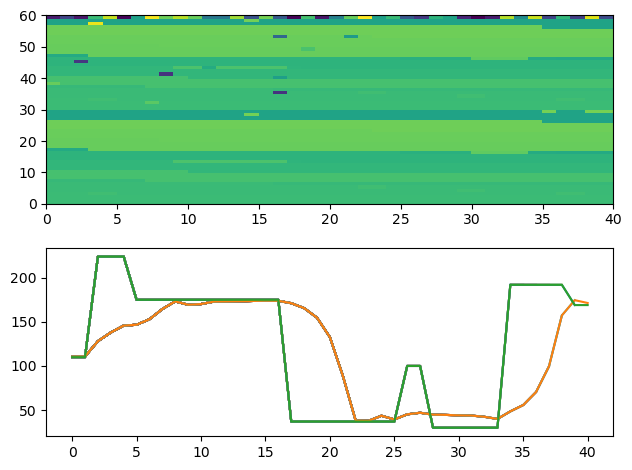

In [53]:
moth = Genetic_Moth(40)
moth.run()